          Model      RMSE        R2
3  RandomForest  2.810963  0.892253
1         Ridge  4.458097  0.728984
0        Linear  4.928602  0.668759
2         Lasso  4.929841  0.668593


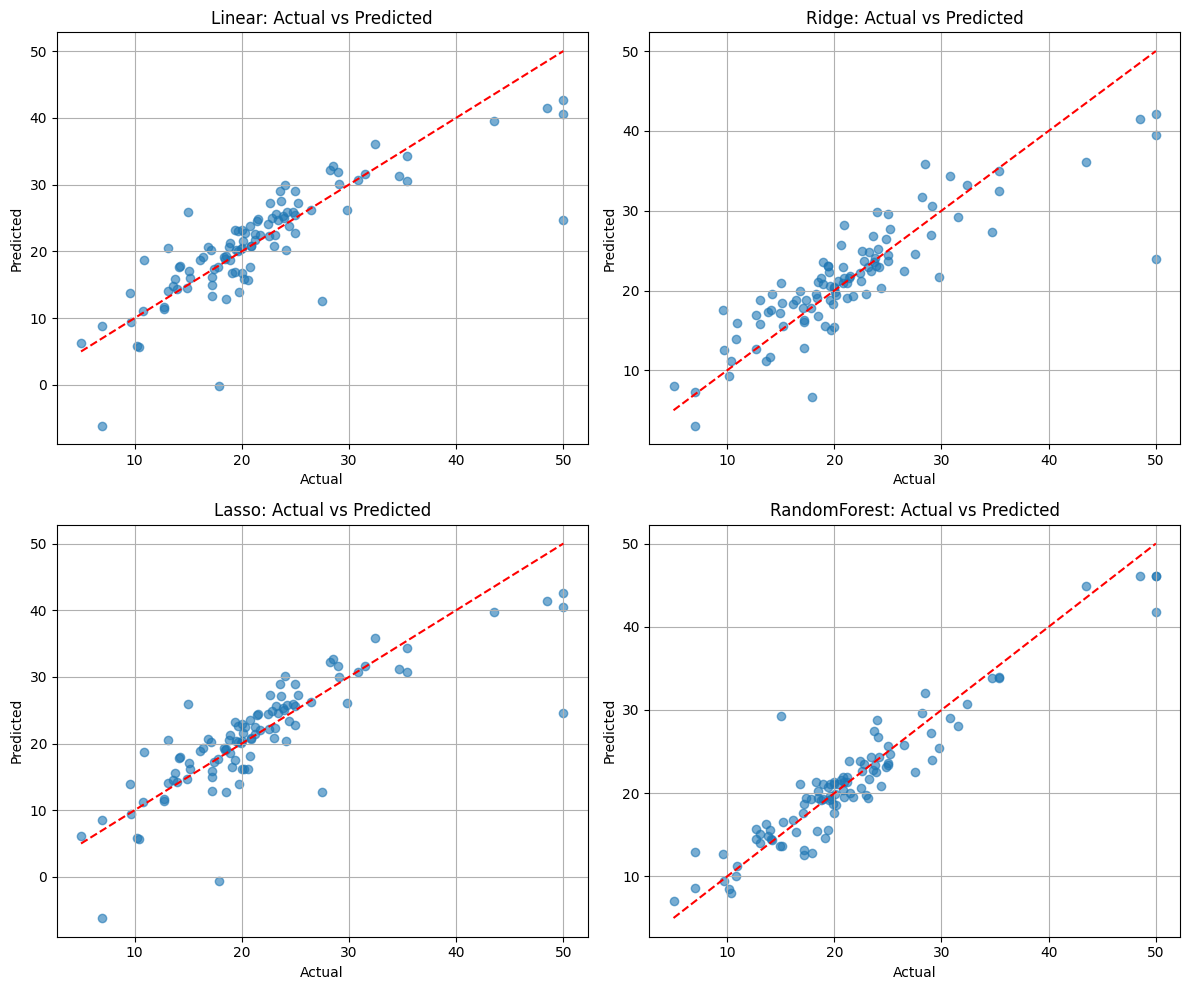

In [14]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load test data
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

# 2. Load scaler (for Linear model only)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # ✅ 여기가 핵심


# 3. Load all models
models = {
    "Linear": pickle.load(open("linear_model.pkl", "rb")),
    "Ridge": pickle.load(open("ridge_model.pkl", "rb")),
    "Lasso": pickle.load(open("lasso_model.pkl", "rb")),
    "RandomForest": pickle.load(open("rf_model.pkl", "rb"))
}

# 4. Evaluate models
results = []
predictions = {}

for name, model in models.items():
    # Linear 모델만 스케일된 데이터 사용
    if name == "Linear":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "R2": r2})
    predictions[name] = y_pred

# 5. 결과 테이블
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

# 6. 시각화: 예측 vs 실제값
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f"{name}: Actual vs Predicted")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.grid(True)

plt.tight_layout()
plt.show()
